In [1]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Dados a serem analisados 
#Dados de imóveis
link = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados_casa = pd.read_csv(link)
dados_casa.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados_casa.sample(10)
n_casas = dados_casa["Bairro"].value_counts()
dados_casa.Metragem.median()
sum((dados_casa["Bairro"] == "Vila Mariana"))
imoveis_vilamariana = dados_casa["Bairro"] == "Vila Mariana"
imoveis_vilamariana



0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [4]:
imoveis_vl_mariana = dados_casa[imoveis_vilamariana]

In [5]:
# Média de metragem bairro Vila Mariana
imoveis_vl_mariana['Metragem'].mean()

233.6195652173913

<AxesSubplot:title={'center':'Imoveis x Bairro'}, ylabel='Bairro'>

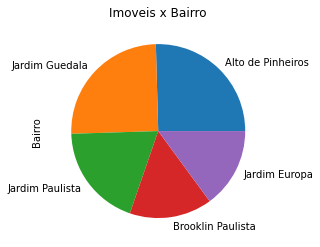

In [6]:
# Gráfico de Pizza por bairros
n_casas.head(5).plot.pie(title = "Imoveis x Bairro")

<AxesSubplot:xlabel='Bairro'>

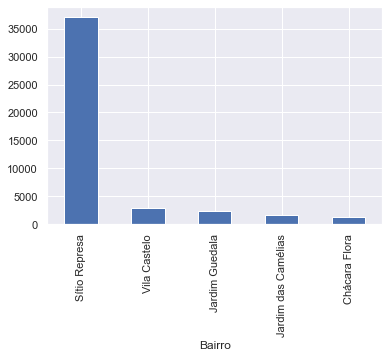

In [32]:
# Médida de metragem por bairros - Desafio 1
media = dados_casa.groupby(by="Bairro")["Metragem"]
b_media = media.mean().sort_values(ascending=False)
b_media.head(5).plot.bar()


In [8]:
# Desafio 2 - Encontre 2 formas de selecionar os dados por bairro

f1 = dados_casa["Bairro"]
f2 = dados_casa.Bairro
f3 = dados_casa.loc[lambda dados_casa: dados_casa['Bairro'] == 'Vila Leonor']


In [9]:
#Pegar outras estatísticas de dados, sum, min, max

dados_casa.head()
m_quartos = dados_casa.groupby("Bairro")['Quartos'].agg([min,max,sum])
m_quartos.sample(10)



,min,max,sum
Bairro,,,
Vila Santo Estevão,3,3,3
Vila Fachini,2,4,22
Jardim Vila Mariana,3,5,102
Rio Bonito,5,5,10
Vila Santa Catarina,1,6,80
Jardim Cambara,4,4,8
Vila Rosa,3,3,3
Vila Santa Clara,2,3,7
Jardim Nossa Senhora do Carmo,2,3,10


In [10]:
#Desafio 4, descobrir quais Bairros possuem rua sem nome

b_rua = dados_casa.query('Rua.isnull()')['Bairro'].value_counts()
b_rua



Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

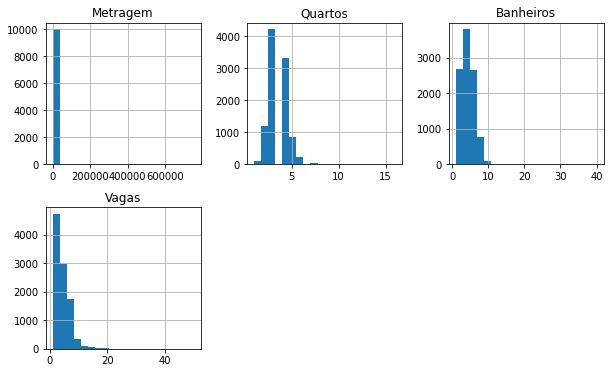

In [11]:
dados_casa.hist(figsize=(10,6), layout=(2,3), bins=20)
print()

In [12]:
dados_casa['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [13]:
dados_casa['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [14]:
dados_casa[["Moeda", "Valor_novo", "Tipo_anuncio"]] = dados_casa['Valor'].str.split(expand = True)
dados_casa.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_novo,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [15]:
dados_casa[dados_casa['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

In [16]:
dados = dados_casa[dados_casa['Tipo_anuncio'].isnull()]
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rua           6107 non-null   object
 1   Bairro        9146 non-null   object
 2   Cidade        9156 non-null   object
 3   Metragem      9156 non-null   int64 
 4   Quartos       9156 non-null   int64 
 5   Banheiros     9156 non-null   int64 
 6   Vagas         9156 non-null   int64 
 7   Valor         9156 non-null   object
 8   Moeda         9156 non-null   object
 9   Valor_novo    9156 non-null   object
 10  Tipo_anuncio  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [17]:
dados['Valor_novo'].str.replace(".","").astype(float)

C:\Users\thiag\AppData\Local\Temp\ipykernel_8760\250546743.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Valor_novo'].str.replace(".","").astype(float)


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_novo, Length: 9156, dtype: float64

In [18]:
dados['Valor_novo'] = dados['Valor_novo'].str.replace(".","").astype(float)

C:\Users\thiag\AppData\Local\Temp\ipykernel_8760\4204578745.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Valor_novo'] = dados['Valor_novo'].str.replace(".","").astype(float)
C:\Users\thiag\AppData\Local\Temp\ipykernel_8760\4204578745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Valor_novo'] = dados['Valor_novo'].str.replace(".","").astype(float)


In [19]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_novo
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


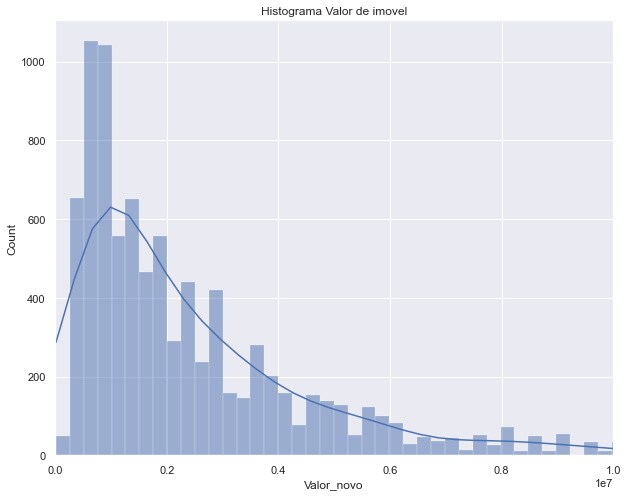

In [20]:
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot( data = dados, x = 'Valor_novo', kde = True)
ax.set_title('Histograma Valor de imovel')
plt.xlim((-50, 10000000))
plt.show()

In [21]:
# Desafio 1(Aula 2) - Criando uma coluna com escala em Milhoes
dados['Valor_em_milhoes'] = dados['Valor_novo']/100000
dados

C:\Users\thiag\AppData\Local\Temp\ipykernel_8760\2811049001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Valor_em_milhoes'] = dados['Valor_novo']/100000


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_novo,Tipo_anuncio,Valor_em_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None,70.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None,37.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None,3.80
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None,6.85
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None,5.40
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.0,None,15.00
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.0,None,6.65
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.0,None,23.00
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.0,None,10.50


In [22]:
# Tirando a notação cientifica para 1 casa depois da vírgula
pd.set_option('display.precision', 1)
pd.set_option("display.float_format", lambda x: '%.1f' % x)
dados.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_novo,Valor_em_milhoes
count,9156.0,9156.0,9156.0,9156.0,9156.0,9156.0
mean,434.4,3.4,3.8,4.0,3052203.0,30.5
std,7856.4,1.0,2.0,2.6,3944208.2,39.4
min,10.0,1.0,1.0,1.0,13000.0,0.1
25%,168.0,3.0,2.0,2.0,890000.0,8.9
50%,276.0,3.0,4.0,4.0,1800000.0,18.0
75%,450.0,4.0,5.0,5.0,3500000.0,35.0
max,750000.0,16.0,40.0,50.0,65000000.0,650.0


In [23]:
dados[['Rua','Bairro','Cidade']].describe(include ='all')

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


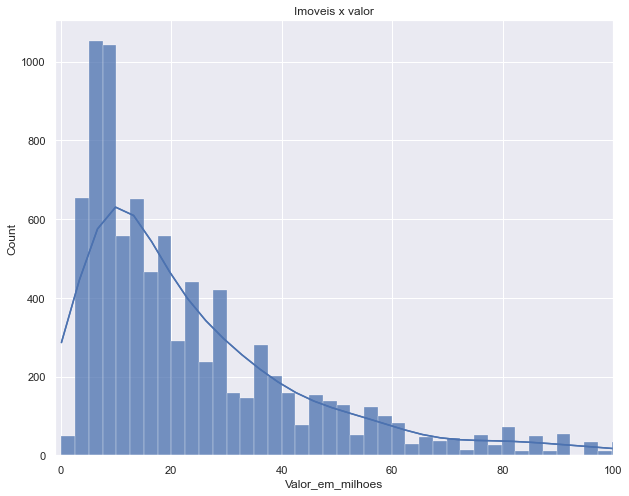

In [24]:
sns.set()
plt.figure(figsize=(10,8))
sns.histplot( data = dados, x = 'Valor_em_milhoes', kde = True)
grafico = sns.histplot( data = dados, x = 'Valor_em_milhoes', kde = True)
grafico.set_title('Imoveis x valor')
plt.xlim(-1, 100)
plt.show()


In [25]:
dados['Preco_m_quadrado'] = dados.Valor_novo/dados.Metragem

preco_metro_quadrado_bairro = dados.groupby('Bairro')['Preco_m_quadrado'].mean().head(20).reset_index()

metro_quadrado_por_bairro = preco_metro_quadrado_bairro.sort_values(by='Preco_m_quadrado', ascending=False)

metro_quadrado_por_bairro


C:\Users\thiag\AppData\Local\Temp\ipykernel_8760\1048375695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Preco_m_quadrado'] = dados.Valor_novo/dados.Metragem


,Bairro,Preco_m_quadrado
18,Brooklin Novo,12343.1
4,Alto de Pinheiros,11270.0
12,Boaçava,9712.5
17,Brooklin,7893.9
0,Aclimação,7656.2
2,Alto da Lapa,7606.7
19,Brooklin Paulista,7264.9
9,Bela Aliança,7233.5
15,Bosque da Saúde,6303.9
7,Barra Funda,6173.4


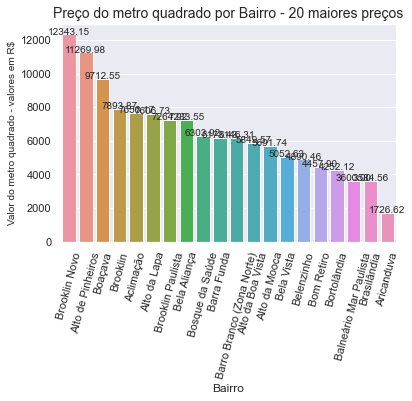

In [26]:
# Plotando um gráfico de barras com 20 valores do metro quadrado por bairro:

ax = sns.barplot(data=metro_quadrado_por_bairro, x='Bairro', y='Preco_m_quadrado')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.title('Preço do metro quadrado por Bairro - 20 maiores preços', fontsize=14)
plt.ylabel('Valor do metro quadrado - valores em R$', fontsize=10)

# Para adicionar o rótulo em cima das colunas exibindo valor:

for rotulo in ax.patches:
  height = rotulo.get_height()
  ax.text(rotulo.get_x()+rotulo.get_width()/2.,height + 3,'{:1.2f}'.format((height)),ha='center', fontsize=10)


print()

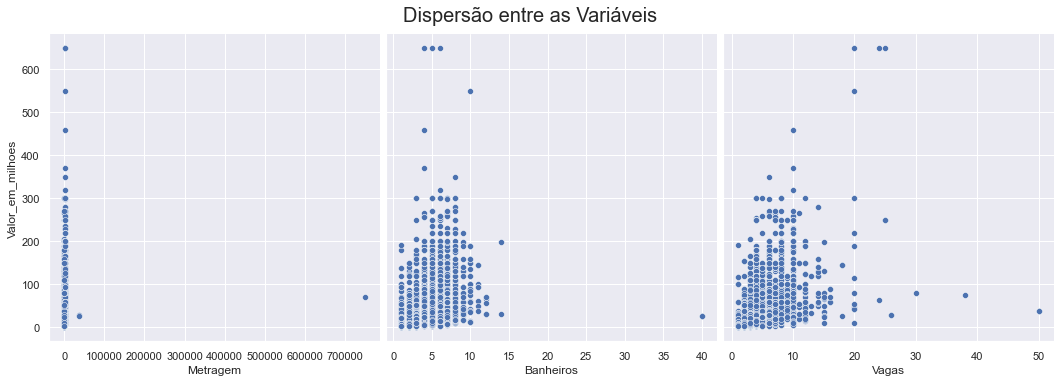

In [27]:
#Avaliação: Os valores estão coerentes com a localização dos imóveis, sendo os valores mais altos em áreas nobres da capital paulita.
#Desafio # 4:

# Explorar as bibliotecas de visualizações e colocar as suas conclusão

# Plotando um TreeMap:

# squarify.plot(sizes=metro_quadrado_por_bairro['Preco_m_quadrado'], label=metro_quadrado_por_bairro['Bairro'], alpha=.9 )
# plt.axis('off')
# plt.show()
# Plotando um gráfico de comparação entre as variáveis do dataset:

ax = sns.pairplot(dados, y_vars='Valor_em_milhoes', x_vars=['Metragem', 'Banheiros', 'Vagas'], height=5)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

print()

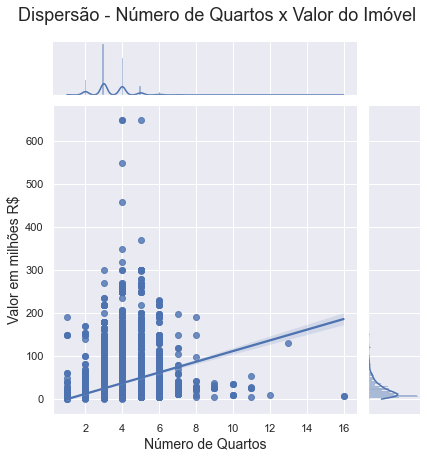

In [28]:
# Mais uma opção de visualização da Dispersão entre duas variáveis, o gráfico Jointplot do Seaborn

ax = sns.jointplot(x='Quartos', y='Valor_em_milhoes', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Número de Quartos x Valor do Imóvel', fontsize=18, y = 1.05)
ax.set_axis_labels('Número de Quartos', 'Valor em milhões R$', fontsize=14)
ax
print()

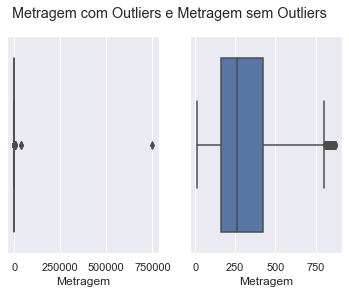

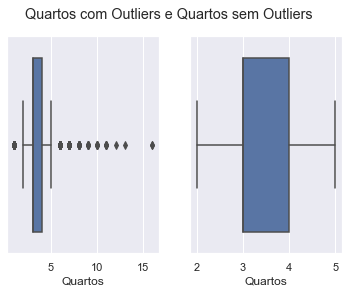

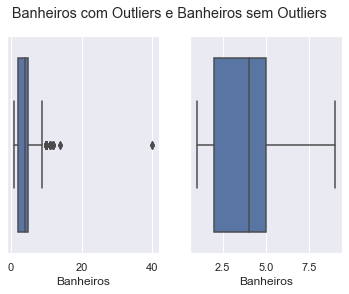

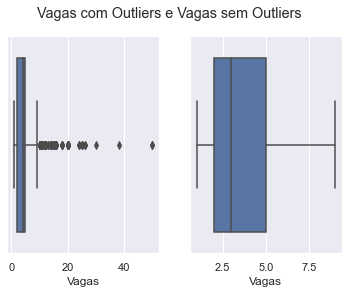

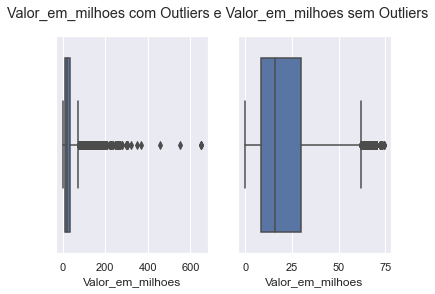

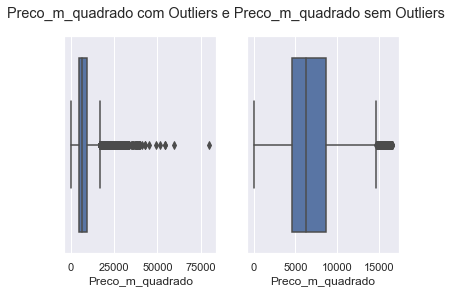

In [29]:
# Desafio # 5

# Pesquisar um visualização para analisar os quartis, mediana e outliers.
numericos = dados[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_em_milhoes', 'Preco_m_quadrado']]
# Primeiro calculamos as medidas separatrizes para segregar os Outliers:

Q1_dados = numericos.quantile(.25)
Q3_dados = numericos.quantile(.75)
IIQ_dados = Q3_dados-Q1_dados
limite_inferior_dados = Q1_dados - 1.5 * IIQ_dados
limite_superior_dados = Q3_dados + 1.5 * IIQ_dados
# De posso das medidas separatrizes filtramos o dataset para eliminar os Outliers:

selecao = (numericos >= limite_inferior_dados) & (numericos <= limite_superior_dados)

dados_new = dados[selecao]
# Importando a biblioteca warnings para remover os vários avisos gerados pela plotagem dos gráficos:

import warnings
warnings.filterwarnings('ignore')
# Plotando gráficos BoxPlot das variáveis numéricas com Outliers e sem os Outliers:

for i in numericos:
  f, axes = plt.subplots(1, 2)
  f.suptitle(i + ' com Outliers e ' + i + ' sem Outliers')
  sns.boxplot(  x= i, data=dados, ax=axes[0])
  sns.boxplot(  x= i, data=dados_new, ax=axes[1])  

print()

In [30]:
# A presença dos Outliers impacta significamente nos resultados e, é de suma importância sua identificação e se possivel, sua eliminação.

